# Single Cell analysis - Scanpy
## Author: Negar Sadeghipour
### This is a pipeline to analyze single-cell RNA Seq data from GEO. In this script the single cell RNA-Seq results from this paper is regenerated: https://pubmed.ncbi.nlm.nih.gov/34956864/ Title: Bulk and Single-Cell Profiling of Breast Tumors Identifies TREM-1 as a Dominant Immune Suppressive Marker Associated With Poor Outcomes

# 1. library loading

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import os

# 2. Read the data into an AnnData object

## 2.1. Unzip the GEO downloaded dataset (GSE188600)

In [2]:
import gzip, shutil
dir_name = '/Users/negarsadeghipour/Documents/Bioinformatics pipelines with examples and R codes/Single Cell RNASeq/Projects/TNBC-human-Python'
def gz_extract(directory):
    extension = ".gz"
    os.chdir(directory)
    for item in os.listdir(directory): # loop through items in dir
      if item.endswith(extension): # check for ".gz" extension
          gz_name = os.path.abspath(item) # get full path of files
          file_name = (os.path.basename(gz_name)).rsplit('.',1)[0] #get file name for file within
          with gzip.open(gz_name,"rb") as f_in, open(file_name,"wb") as f_out:
              shutil.copyfileobj(f_in, f_out)
          os.remove(gz_name) # delete zipped file      
gz_extract(dir_name + '/data')

## 2.2. Create the AnnData object

In [3]:
dir_list = os.listdir(dir_name + '/data')
print(dir_list)

['GSM5686673_matrix.mtx', 'GSM5686673_genes.tsv', 'GSM5686673_barcodes.tsv']


In [4]:
adata = sc.read_mtx(dir_name + '/data/GSM5686673_matrix.mtx').T
genes = pd.read_csv(dir_name + '/data/GSM5686673_genes.tsv', sep='\t', header=None)
barcodes = pd.read_csv(dir_name + '/data/GSM5686673_barcodes.tsv', sep='\t', header=None)
adata.var_names = np.transpose(genes.iloc[:, 1].values)
adata.obs_names = np.transpose(barcodes.iloc[:, 0].values)

In [5]:
adata.obs

""
AAACCTGTCGTGACAT-1
AAAGATGTCGCCTGTT-1
AAAGCAAAGAGCTATA-1
AAAGCAACAAGTAGTA-1
AAAGTAGCATGCTAGT-1
...
TTTCCTCGTGTTGAGG-1
TTTGCGCGTCATCCCT-1
TTTGGTTGTTAAGTAG-1
TTTGTCAAGATATGCA-1


In [6]:
adata.var

""
RP11-34P13.3
FAM138A
OR4F5
RP11-34P13.7
RP11-34P13.8
...
AC233755.2
AC233755.1
AC240274.1
AC213203.1


In [7]:
adata.X

<770x33694 sparse matrix of type '<class 'numpy.float32'>'
	with 1224966 stored elements in Compressed Sparse Row format>

# 3. Data preprocessing and quality control

## 3.1. Find mitochondrial genes

In [8]:
adata.var[adata.var.index.str.startswith('MT-')]

""
MT-ND1
MT-ND2
MT-CO1
MT-CO2
MT-ATP8
MT-ATP6
MT-CO3
MT-ND3
MT-ND4L
MT-ND4


## 3.2. Create a new column to show True for mitochondrial genes

In [9]:
adata.var['mt'] = adata.var.index.str.startswith('MT-')

## 3.3. Calculate QC parameters

In [10]:
sc.pp.calculate_qc_metrics(adata, qc_vars = ['mt'], percent_top=None, log1p=False, inplace=True)

In [11]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCTGTCGTGACAT-1,1301,3057.0,56.0,1.831861
AAAGATGTCGCCTGTT-1,1903,7981.0,217.0,2.718957
AAAGCAAAGAGCTATA-1,876,1814.0,27.0,1.488423
AAAGCAACAAGTAGTA-1,1325,2749.0,62.0,2.255366
AAAGTAGCATGCTAGT-1,1406,5421.0,190.0,3.504888
...,...,...,...,...
TTTCCTCGTGTTGAGG-1,942,2209.0,45.0,2.037121
TTTGCGCGTCATCCCT-1,3849,20611.0,572.0,2.775217
TTTGGTTGTTAAGTAG-1,1078,3324.0,71.0,2.135981
TTTGTCAAGATATGCA-1,1002,2088.0,23.0,1.101533


In [12]:
adata.var

,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
RP11-34P13.3,False,0,0.000000,100.000000,0.0
FAM138A,False,0,0.000000,100.000000,0.0
OR4F5,False,0,0.000000,100.000000,0.0
RP11-34P13.7,False,1,0.001299,99.870130,1.0
RP11-34P13.8,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...
AC233755.2,False,1,0.001299,99.870130,1.0
AC233755.1,False,0,0.000000,100.000000,0.0
AC240274.1,False,17,0.023377,97.792208,18.0
AC213203.1,False,0,0.000000,100.000000,0.0


## 3.4. Sort adata by number of cells

In [13]:
adata.var.sort_values('n_cells_by_counts')

,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
RP11-34P13.3,False,0,0.000000,100.00000,0.0
RP11-262A12.1,False,0,0.000000,100.00000,0.0
C11orf87,False,0,0.000000,100.00000,0.0
RP11-708B6.2,False,0,0.000000,100.00000,0.0
RP11-25I9.2,False,0,0.000000,100.00000,0.0
...,...,...,...,...,...
RPL41,False,768,36.640259,0.25974,28213.0
TMSB4X,False,769,98.533768,0.12987,75871.0
RPS2,False,769,30.681818,0.12987,23625.0
B2M,False,770,103.684418,0.00000,79837.0


## 3.5. filter genes based on the minimum number of cells and counts

In [14]:
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata, min_counts=800)

## 3.6. plotting QC metrics 

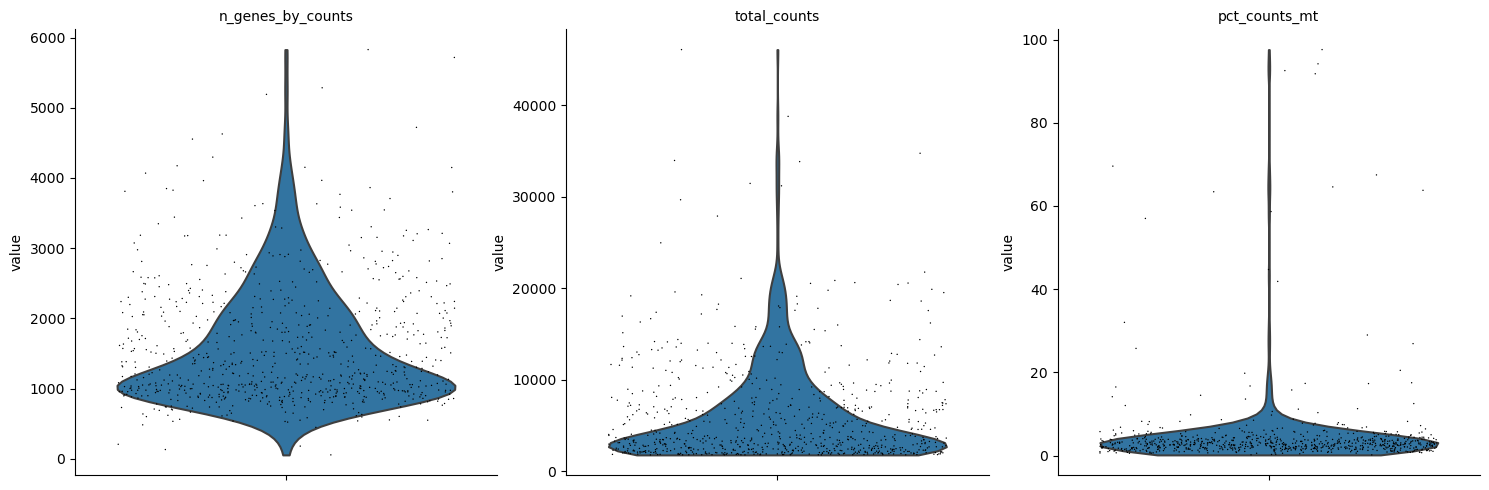

In [15]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter = 0.4, multi_panel = True)

## 3.7. Filter data to 0.98 percentile

In [16]:
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, 0.98)

In [17]:
adata = adata[adata.obs.n_genes_by_counts.values < upper_lim]

## 3.8. keep data with mitochondrial percentage less than 20%

In [18]:
adata = adata[adata.obs.pct_counts_mt < 20]

# 4. Normalization

## 4.1. Normalize gene expressions to 10,000 UMI across all cells

In [19]:
adata.X.sum(axis = 1)[1:10]

matrix([[ 7969.],
        [ 1805.],
        [ 2736.],
        [ 5412.],
        [ 1944.],
        [13199.],
        [ 5103.],
        [ 6846.],
        [18239.]], dtype=float32)

In [20]:
sc.pp.normalize_total(adata, target_sum=1e4)

/Users/negarsadeghipour/opt/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [21]:
adata.X.sum(axis = 1)[1:10]

matrix([[10000.   ],
        [10000.   ],
        [10000.   ],
        [10000.   ],
        [10000.   ],
        [ 9999.999],
        [10000.   ],
        [10000.001],
        [ 9999.999]], dtype=float32)

## 4.2. log transform the data

In [22]:
sc.pp.log1p(adata)

## 4.3. Make a copy of raw data

In [23]:
adata.raw = adata

# 5. Clustering

In [24]:
## 5.1. Calculate and plot highly variable genes up to 2000 genes

In [25]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000)

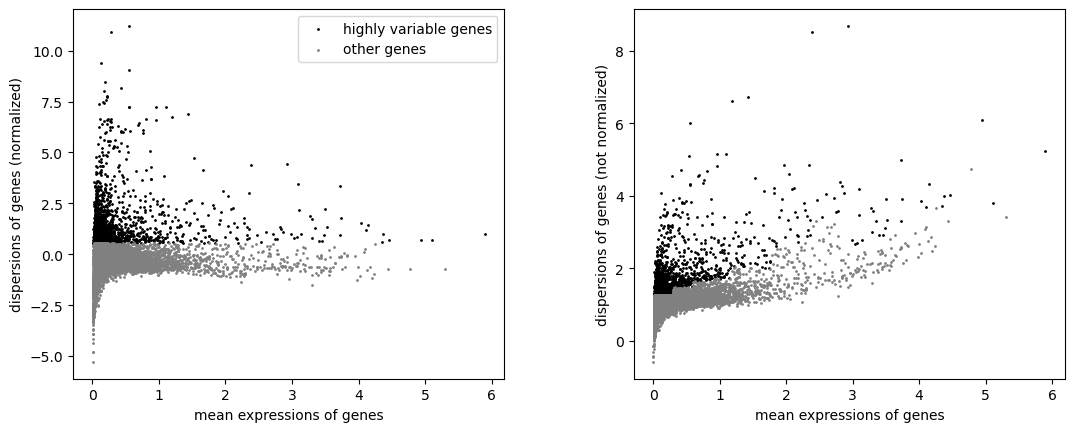

In [26]:
sc.pl.highly_variable_genes(adata)

## 5.1. keep only the highly variable genes

In [27]:
adata = adata[:, adata.var.highly_variable]

## 5.2. Regress out (mostly) unwanted sources of variation

In [28]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

### 5.3. scale data to mean of zero and variance of 1

In [29]:
sc.pp.scale(adata, max_value=10)

## 5.4. compuate pca and visualize the elbow plot

In [30]:
sc.tl.pca(adata, svd_solver='arpack')

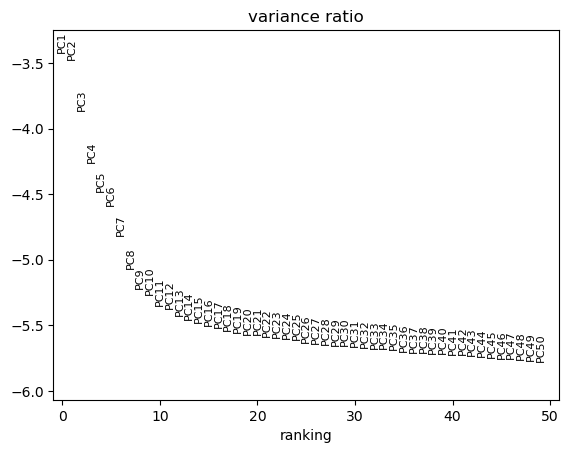

In [31]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [32]:
sc.pp.neighbors(adata, n_pcs = 30)

In [33]:
adata.obsp['connectivities']

<736x736 sparse matrix of type '<class 'numpy.float32'>'
	with 15956 stored elements in Compressed Sparse Row format>

## 5.5. Create and visualize the UMAP

In [34]:
sc.tl.umap(adata)

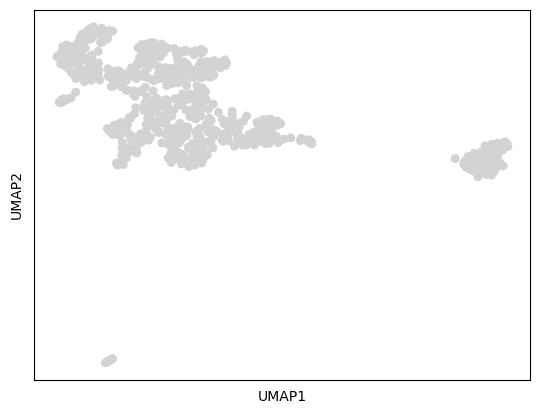

In [35]:
sc.pl.umap(adata)

## 5.6. Set a resolution (0.5)
### Note: this resolution might be updated based during annotation

In [36]:
sc.tl.leiden(adata, resolution = 0.45)

In [37]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_counts,leiden
AAACCTGTCGTGACAT-1,1301,3057.0,56.0,1.831861,3041.0,0
AAAGATGTCGCCTGTT-1,1903,7981.0,217.0,2.718957,7969.0,3
AAAGCAAAGAGCTATA-1,876,1814.0,27.0,1.488423,1805.0,0
AAAGCAACAAGTAGTA-1,1325,2749.0,62.0,2.255366,2736.0,0
AAAGTAGCATGCTAGT-1,1406,5421.0,190.0,3.504888,5412.0,1
...,...,...,...,...,...,...
TTTATGCCATGCTAGT-1,1158,3628.0,49.0,1.350606,3611.0,4
TTTCCTCGTGTTGAGG-1,942,2209.0,45.0,2.037121,2198.0,2
TTTGGTTGTTAAGTAG-1,1078,3324.0,71.0,2.135981,3313.0,4
TTTGTCAAGATATGCA-1,1002,2088.0,23.0,1.101533,2081.0,0


## 5.8. Visualize the UMAP colored by leiden column

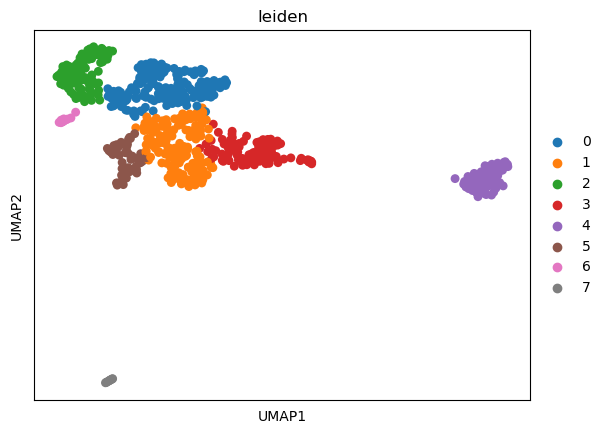

In [38]:
sc.pl.umap(adata, color=['leiden'])

# 6. Find Markers/label cell types

In [39]:
sc.tl.rank_genes_groups(adata, 'leiden')

## 6.1. Find the most variable genes in each cluster

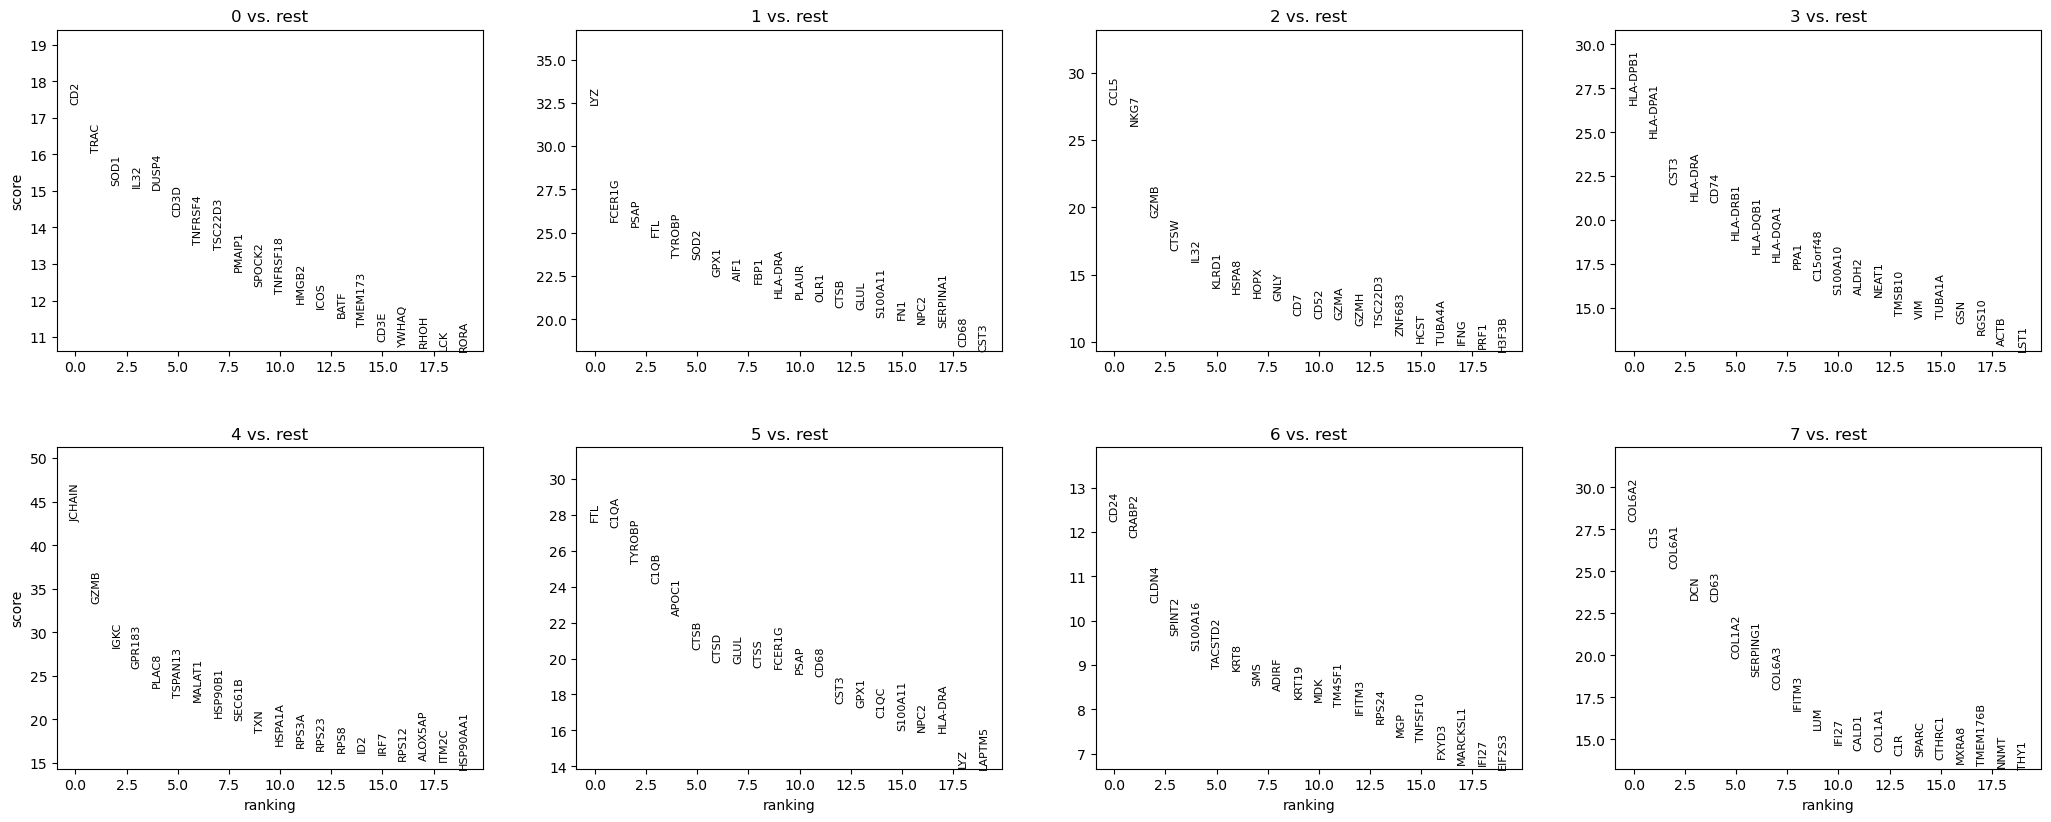

In [40]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [41]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,CD2,17.390635,3.787149,2.957162e-45,6.195823e-43
1,0,TRAC,16.058481,3.325987,6.704422e-42,1.141323e-39
2,0,SOD1,15.158201,2.136654,1.853754e-40,2.970096e-38
3,0,IL32,15.095719,2.854942,1.042963e-40,1.695983e-38
4,0,DUSP4,15.041635,2.750019,3.680936e-39,5.648423e-37
...,...,...,...,...,...,...
76568,7,OLFML3,2.722069,4.895644,2.349569e-02,4.980264e-02
76569,7,RABAC1,2.722055,1.483104,2.281463e-02,4.840612e-02
76570,7,IFITM1,2.719907,1.986051,2.316302e-02,4.913573e-02
76571,7,TSPAN4,2.719241,3.069199,2.350269e-02,4.980777e-02


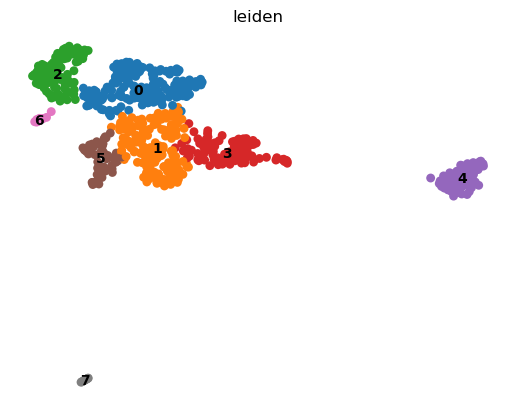

In [42]:
sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc = "on data")

## 6.2. Test the gene expressions in clusters to annotate the data

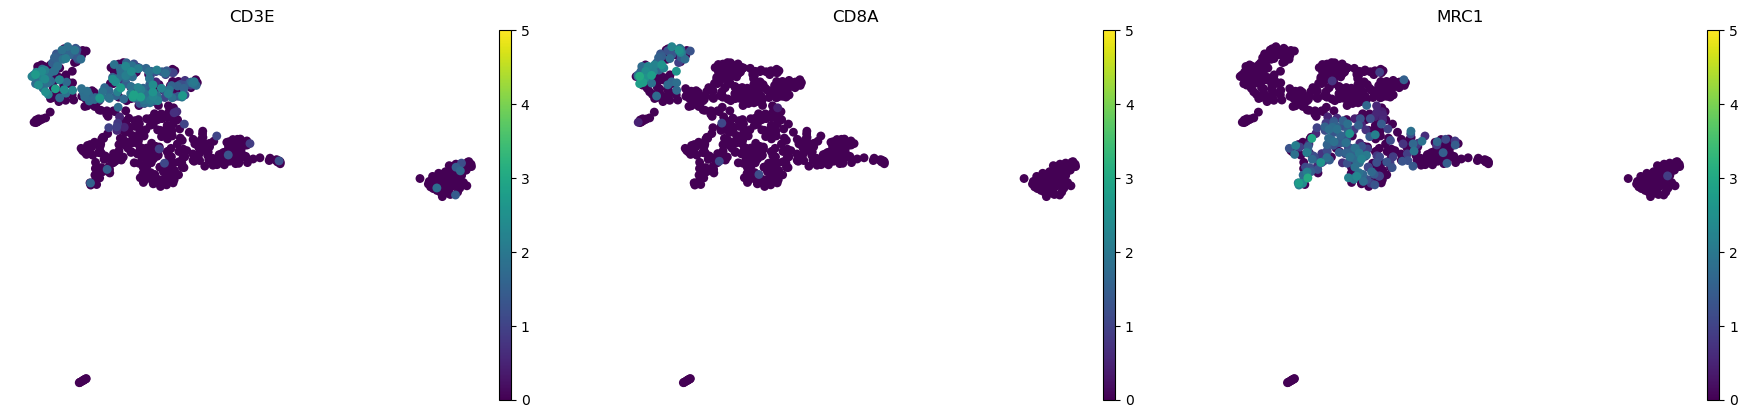

In [43]:
sc.pl.umap(adata, color = ['CD3E', 'CD8A', 'MRC1'], frameon = False, vmax = 5)

## 6.3. Assign a cell type to each cluster

In [44]:
cell_type = {"0":"Helper T cells",
"1":"DC",
"2":"Cytotoxic T cells",
"3":"Mature DC",
"4":"Immature DC",
"5":"NK cells",
"6":"Fibroblast",
"7":"TNBC"}

In [45]:
adata.obs['cell type'] = adata.obs.leiden.map(cell_type)

## 6.4. Visualize the annotated UMAP

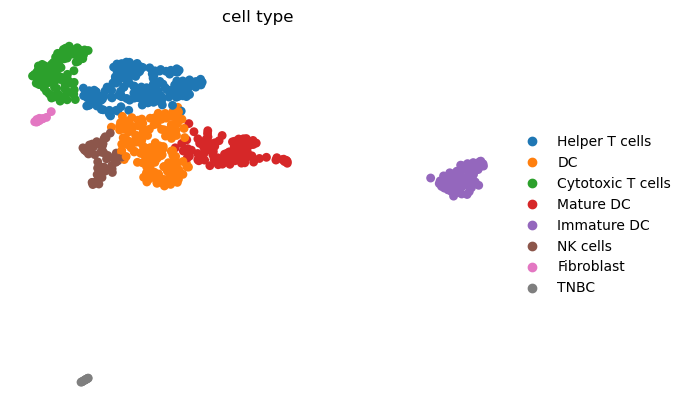

In [46]:
sc.pl.umap(adata, color = ['cell type'], frameon = False)

In [47]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_counts,leiden,cell type
AAACCTGTCGTGACAT-1,1301,3057.0,56.0,1.831861,3041.0,0,Helper T cells
AAAGATGTCGCCTGTT-1,1903,7981.0,217.0,2.718957,7969.0,3,Mature DC
AAAGCAAAGAGCTATA-1,876,1814.0,27.0,1.488423,1805.0,0,Helper T cells
AAAGCAACAAGTAGTA-1,1325,2749.0,62.0,2.255366,2736.0,0,Helper T cells
AAAGTAGCATGCTAGT-1,1406,5421.0,190.0,3.504888,5412.0,1,DC
...,...,...,...,...,...,...,...
TTTATGCCATGCTAGT-1,1158,3628.0,49.0,1.350606,3611.0,4,Immature DC
TTTCCTCGTGTTGAGG-1,942,2209.0,45.0,2.037121,2198.0,2,Cytotoxic T cells
TTTGGTTGTTAAGTAG-1,1078,3324.0,71.0,2.135981,3313.0,4,Immature DC
TTTGTCAAGATATGCA-1,1002,2088.0,23.0,1.101533,2081.0,0,Helper T cells


# 7. Differentially expressed genes

## 7.1. Find differentially expressed genes for each cluster vs. the rest of the clusters

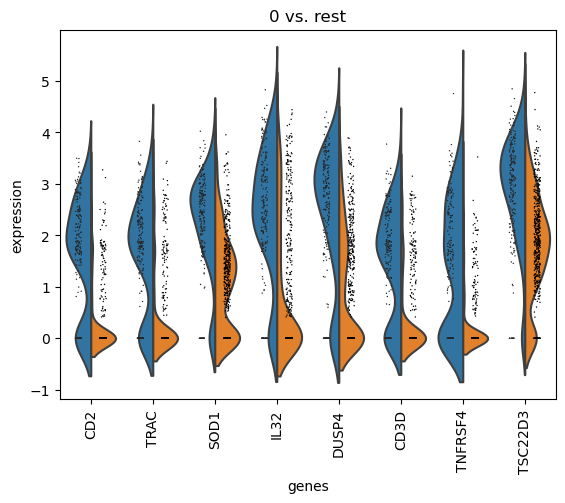

In [48]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

## 7.2. Visualize the gene expression in violin plots

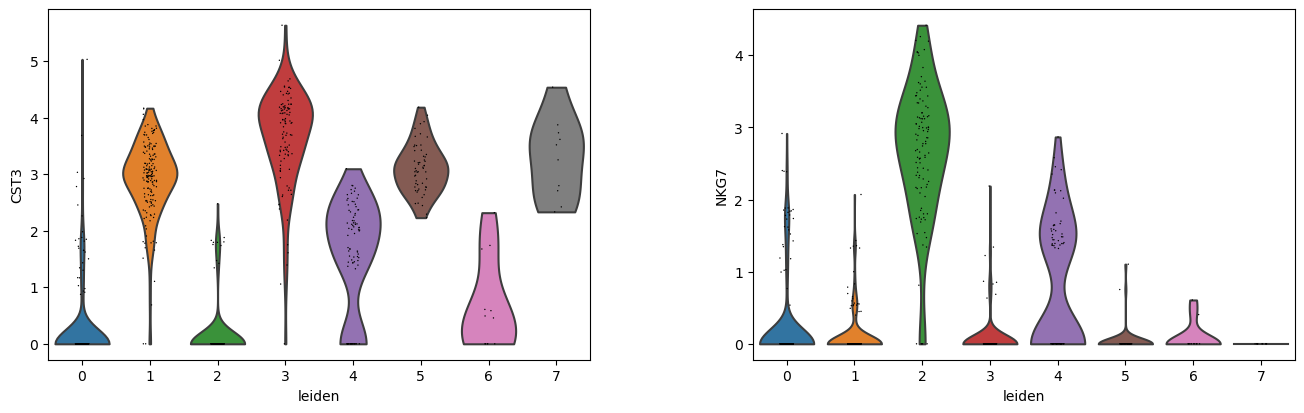

In [49]:
sc.pl.violin(adata, ['CST3', 'NKG7'], groupby='leiden')

In [50]:
marker_genes = ["CST3", "CD3E","SPP1", "C1QA", "CTHRC1", "MGP", "CXCL13", "TNFRSF18", "JCHAIN", "IGKC",
              "NKG7", "GNLY", "IL7R", "STMN1", "KIAA0101"]

### 7.3. Visualize and compare gene expressions in different cell types

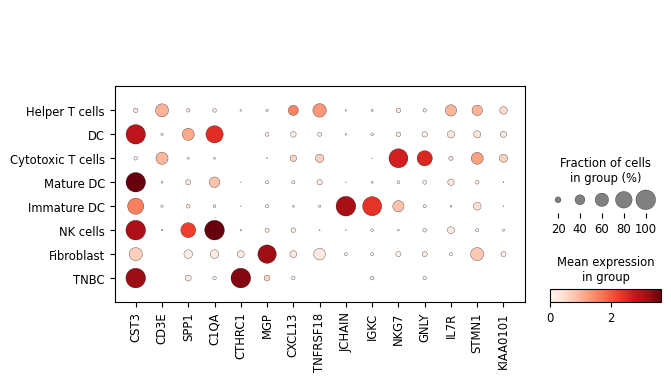

In [51]:
sc.pl.dotplot(adata, marker_genes, groupby='cell type');

#### 7.4. Another visualization of gene expression in different cell types

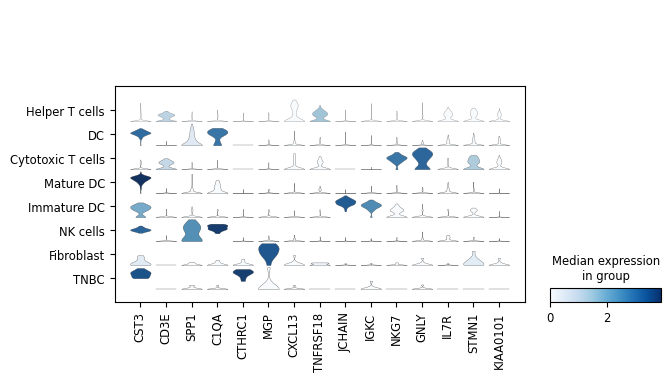

In [52]:
sc.pl.stacked_violin(adata, marker_genes, groupby='cell type', rotation=90);

## 7.5. Heatmap showing the gene expression by cell type

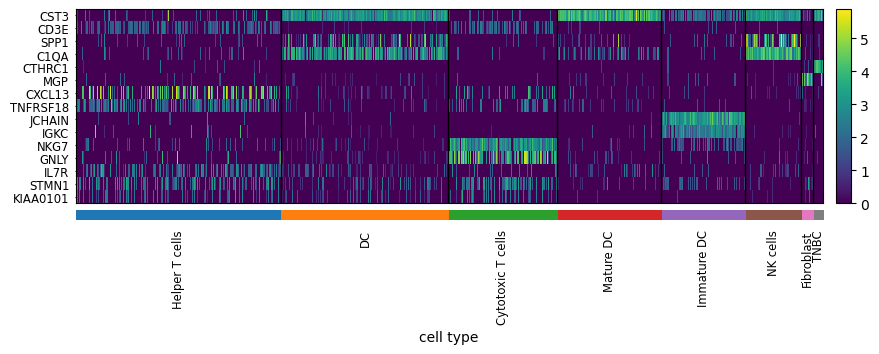

In [53]:
sc.pl.heatmap(adata, marker_genes, groupby='cell type', swap_axes=True)